# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json
from datetime import datetime

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

629

## Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [4]:
city_latitude = []
city_longitude = []
max_temperature = []
humidity = []
cloud_coverage = []
wind_speed = []
city_country = []
city_datetime = []
city_name = []

print("Beginning Data Retrieval")    
print("-----------------------------")

record = 1 
set = 1

for city in cities:
    try: 
        response = requests.get(f"{url}&q={city}").json()
        city_latitude.append(response["coord"]["lat"])
        city_longitude.append(response["coord"]["lon"])
        max_temperature.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        cloud_coverage.append(response["clouds"]["all"])
        wind_speed.append(response["wind"]["speed"])
        city_country.append(response["sys"]["country"])
        city_datetime.append(response["dt"])
        city_name.append(response["name"])

        this_city = response["name"]

        print(f"Processing Record {record} of Set {set} | {this_city}")
        
        record += 1
    
    except KeyError:
        print("City not found. Skipping...")
    
    if record == 51:
        set += 1
        record = 1
        
    time.sleep(1.001)
        
print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")



Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | Ushuaia
Processing Record 2 of Set 1 | New Norfolk
Processing Record 3 of Set 1 | Doha
Processing Record 4 of Set 1 | Marsh Harbour
Processing Record 5 of Set 1 | Sola
Processing Record 6 of Set 1 | Dudinka
Processing Record 7 of Set 1 | Esperance
Processing Record 8 of Set 1 | East London
Processing Record 9 of Set 1 | Terney
Processing Record 10 of Set 1 | Santa Marta
Processing Record 11 of Set 1 | Cape Town
Processing Record 12 of Set 1 | Busselton
Processing Record 13 of Set 1 | Bredasdorp
Processing Record 14 of Set 1 | Port Elizabeth
Processing Record 15 of Set 1 | Cabedelo
Processing Record 16 of Set 1 | Bengkulu
Processing Record 17 of Set 1 | San Patricio
Processing Record 18 of Set 1 | Hofn
Processing Record 19 of Set 1 | Ponta do Sol
Processing Record 20 of Set 1 | Upernavik
Processing Record 21 of Set 1 | Hermanus
Processing Record 22 of Set 1 | Vaini
Processing Record 23 of Set 1 | James

Processing Record 40 of Set 4 | Yumen
Processing Record 41 of Set 4 | Berlevåg
Processing Record 42 of Set 4 | Souillac
Processing Record 43 of Set 4 | Mossamedes
Processing Record 44 of Set 4 | Qazvin
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
Processing Record 45 of Set 4 | San Cristobal
Processing Record 46 of Set 4 | Tura
Processing Record 47 of Set 4 | Kruisfontein
Processing Record 48 of Set 4 | Goma
Processing Record 49 of Set 4 | Trincomalee
Processing Record 50 of Set 4 | Akureyri
Processing Record 1 of Set 5 | Asău
Processing Record 2 of Set 5 | Clemencia
Processing Record 3 of Set 5 | Flinders
Processing Record 4 of Set 5 | Arman'
Processing Record 5 of Set 5 | Xining
City not found. Skipping...
Processing Record 6 of Set 5 | Anadyr
Processing Record 7 of Set 5 | Kaitangata
Processing Record 8 of Set 5 | Ol'ga
Processing Record 9 of Set 5 | Mandalgovi
Processing Record 10 of Set 5 | Saldanha
City not found.

Processing Record 28 of Set 8 | São Miguel do Araguaia
Processing Record 29 of Set 8 | Kuusamo
Processing Record 30 of Set 8 | Puerto Rico
Processing Record 31 of Set 8 | Saint Anthony
Processing Record 32 of Set 8 | Port Blair
Processing Record 33 of Set 8 | Ust'-Karsk
Processing Record 34 of Set 8 | Sistranda
Processing Record 35 of Set 8 | Rome
Processing Record 36 of Set 8 | Merrill
Processing Record 37 of Set 8 | Anagé
Processing Record 38 of Set 8 | Mae Sot
Processing Record 39 of Set 8 | Tibú
City not found. Skipping...
Processing Record 40 of Set 8 | Vilhena
Processing Record 41 of Set 8 | Abnūb
Processing Record 42 of Set 8 | Daru
Processing Record 43 of Set 8 | Altamont
Processing Record 44 of Set 8 | Filimonovo
Processing Record 45 of Set 8 | Erba
Processing Record 46 of Set 8 | Mariehamn
Processing Record 47 of Set 8 | Mananjary
City not found. Skipping...
City not found. Skipping...
Processing Record 48 of Set 8 | Vostok
Processing Record 49 of Set 8 | Ondangwa
Processing 

Processing Record 13 of Set 12 | Kayes
Processing Record 14 of Set 12 | Cam Ranh
City not found. Skipping...
Processing Record 15 of Set 12 | Kingsland
Processing Record 16 of Set 12 | Bentiu
Processing Record 17 of Set 12 | Hanna
Processing Record 18 of Set 12 | Katghora
Processing Record 19 of Set 12 | Piracanjuba
Processing Record 20 of Set 12 | Columbus
Processing Record 21 of Set 12 | Sangar
Processing Record 22 of Set 12 | Lodwar
Processing Record 23 of Set 12 | Murdochville
Processing Record 24 of Set 12 | Esso
City not found. Skipping...
Processing Record 25 of Set 12 | Muriwai Beach
Processing Record 26 of Set 12 | Danilovka
Processing Record 27 of Set 12 | Koshurnikovo
Processing Record 28 of Set 12 | Muisne
City not found. Skipping...
-----------------------------
Data Retrieval Complete
-----------------------------


## Convert Raw Data to DataFrame
* Save as csv

In [6]:
weather_check = {"City" : city_name, "Lat" : city_latitude, "Lng" : city_longitude, "Max Temp" : max_temperature, 
                 "Humidity" : humidity, "Cloudiness" : cloud_coverage, "Wind Speed" : wind_speed, 
                 "Country" : city_country, "Date" : city_datetime}

weather_check_df = pd.DataFrame(weather_check)

weather_check_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ushuaia,-54.80,-68.30,37.11,80,52,8.66,AR,1603109309
1,New Norfolk,-42.78,147.06,51.01,73,81,1.01,AU,1603109310
2,Doha,25.29,51.53,95.00,33,0,10.00,QA,1603109016
3,Marsh Harbour,26.54,-77.06,80.83,76,98,19.89,BS,1603109313
4,Sola,-13.88,167.55,79.90,79,39,17.74,VU,1603109314


In [7]:
weather_check_df.to_csv('../Output/weather_check.csv')

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

### Latitude vs. Temperature Plot

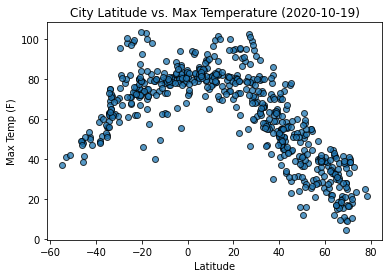

In [8]:
plt.scatter(weather_check_df["Lat"], weather_check_df["Max Temp"], marker = "o", edgecolor = "black", alpha = .75)

plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.title(f"City Latitude vs. Max Temperature ({datetime.now().date()})")

plt.savefig("../Images/lat_vs_temp.png")

To briefly discuss latitude, which is the measure the x-axis focuses on in the above, and next three scatter plots;  it is a city's north-south position, where latitude at the equator is measured as 0&deg; and increases towards 90&deg; as a city gets closer to the north pole and decreases towards -90&deg; as a city gets closer to the south pole. 

The above scatter plot vizualizes how a world city's latitute is related to the city's temperature. As mentioned above, the equator sits at 0&deg; latitude, and based off what we can see in this plot, as a city's latitude gets closer to 0, it's maximum temperature is greater. Whereas city's whose latitude is further from 0, have lower maximum temperatures. Therefore, it can be concluded based on the data, that city's that are closer to the equator are relatively warmer than cities that are further away. 

### Latitude vs. Humidity Plot

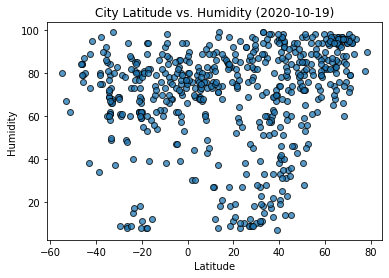

In [9]:
plt.scatter(weather_check_df["Lat"], weather_check_df["Humidity"], marker = "o", edgecolor = "black", alpha = .75)

plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title(f"City Latitude vs. Humidity ({datetime.now().date()})")

plt.savefig("../Images/lat_vs_humidity.png")

This next scatter plot shows the relationship between a world city's latitude and the humidity in that city. As shown in the scatter plot, there is really no clear relationship between latitude and humidity, but there is a larger cluster of data points in the top righthand corner of the plot, so maybe there is something to say about cities closer to the north pole with higher temperatures, but nothing can be determined from this plot. 

### Latitude vs. Cloudiness Plot

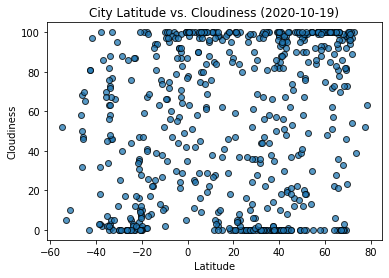

In [10]:
plt.scatter(weather_check_df["Lat"], weather_check_df["Cloudiness"], marker = "o", edgecolor = "black", alpha = .75)

plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title(f"City Latitude vs. Cloudiness ({datetime.now().date()})")

plt.savefig("../Images/lat_vs_cloudiness.png")

Similarly to the humidity scatter plot, this plot, which looks at the relationship between city latitude and cloudiness does not indicate any strong relationship between the two. Again, there are more densely clustered data points along the bottom and top of the plot, where 0% cloudiness and 100% cloudiness data points sit, but nothing definitive can be said about this relationship based on this plot. 

### Latitude vs. Wind Speed Plot

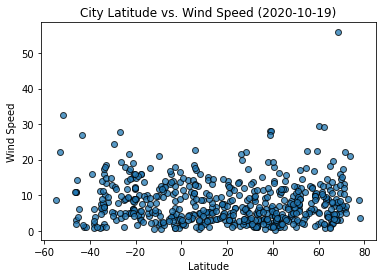

In [11]:
plt.scatter(weather_check_df["Lat"], weather_check_df["Wind Speed"], marker = "o", edgecolor = "black", alpha = .75)

plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title(f"City Latitude vs. Wind Speed ({datetime.now().date()})")

plt.savefig("../Images/lat_vs_wind_speed.png")

This last scatter plot looks at the relationship between city latitude and wind speed. The data points are most densely populated all along the bottom of the graph, with a pretty even spread of datapoints having higher wind speeds. Again, it would be pretty difficult to say anything about the relationship between latitude and wind speed based solely off the scatter plot shown.

## Linear Regression

In [12]:
northern_hemisphere = weather_check_df.loc[weather_check_df["Lat"] >= 0]
southern_hemisphere = weather_check_df.loc[weather_check_df["Lat"] < 0]

###  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

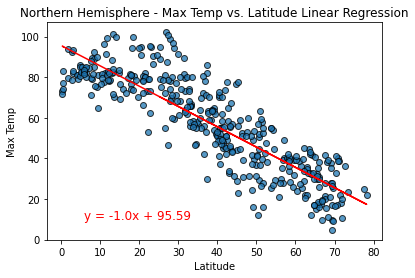

The r-value is: -0.8707758606293444


In [13]:
x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values, marker = "o", edgecolor = "black", alpha = .75)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10), fontsize=12, color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.savefig("../Images/northern_max_temp_linregress.png")
plt.show()

print(f"The r-value is: {rvalue}")

The linear regression plot above shows the relationship between latitude in the northern hemisphere and the max temperature. Temperature and latitude have a negative correlation in the northern hemisphere, which can be seen in the plot, since a greater latitude is associated with lower temperatures and vice versa. It can also be determined by the r-value that the two variables are closely related, based on how close the value is to -1. 

###  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

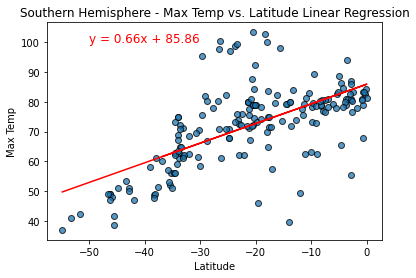

The r-value is: 0.640264145351852


In [14]:
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values, marker = "o", edgecolor = "black", alpha = .75)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,100), fontsize=12, color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.savefig("../Images/southern_max_temp_linregress.png")
plt.show()

print(f"The r-value is: {rvalue}")

The linear regression plot above shows the relationship between latitude in the southern hemisphere and the max temperature. Temperature and latitude have a positive correlation in the southern hemisphere, which can be seen in the plot, since a greater latitude is associated with greater temperatures. Although, the correlation between the two variables is not as great as the correlation between latitude and temperature in the northern hemisphere. 

###  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

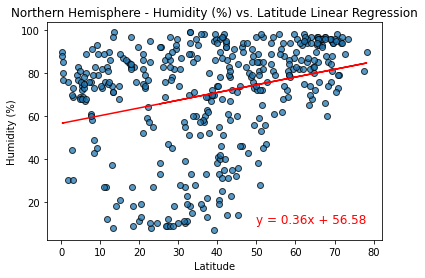

The r-value is: 0.2911023452747316


In [15]:
x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values, marker = "o", edgecolor = "black", alpha = .75)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50, 10), fontsize=12, color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.savefig("../Images/northern_humidity_linregress.png")
plt.show()

print(f"The r-value is: {rvalue}")

The linear regression plot above shows the relationship between latitude in the nothern hemisphere and humidity. Humidity and latitude have a positive correlation in the northern hemisphere, which can be seen in the plot, since a greater latitude is associated with greater humidity. The two variables here are not strongly correlated, which, again, we can determine by the r-value, which in this class is much closer to 0 than it is to 1. 

###  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

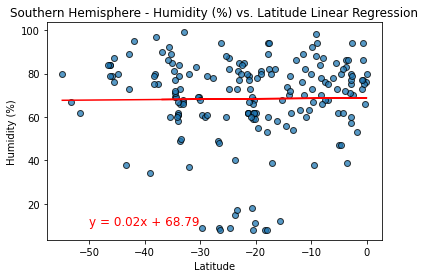

The r-value is: 0.013551332299347693


In [16]:
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values, marker = "o", edgecolor = "black", alpha = .75)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,10), fontsize=12, color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.savefig("../Images/southern_humidity_linregress.png")
plt.show()

print(f"The r-value is: {rvalue}")

The linear regression plot above shows the relationship between latitude in the souther hemisphere and humidity. Humidity and latitude have a positive correlation in the southern hemisphere, which is represented by the positively sloped linear regression line in the plot. But looking at the data points alone, it would be somewhat difficult to determine that. The two variables here are almost not  correlated at all based on the very very low r-value. 

###  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

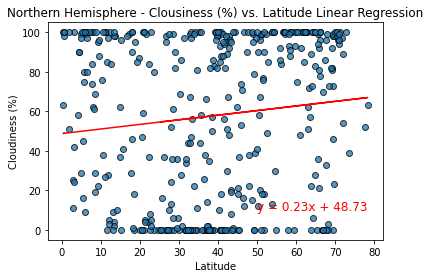

The r-value is: 0.11828132148126781


In [17]:
x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values, marker = "o", edgecolor = "black", alpha = .75)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50, 10), fontsize=12, color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Northern Hemisphere - Clousiness (%) vs. Latitude Linear Regression")
plt.savefig("../Images/northern_clousiness_linregress.png")
plt.show()

print(f"The r-value is: {rvalue}")

The linear regression plot above shows the relationship between latitude in the northern hemisphere and cloud coverage. Cloud coverage and latitude have a positive correlation in the northern hemisphere. Again, looking at the data points alone, it is difficult to come to that conclusion, but the linear regression line helps give a bit more indication as that. We can also tell there is a lack of correlation between the two variables here because the r-value is fairly close to 0. 

###  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

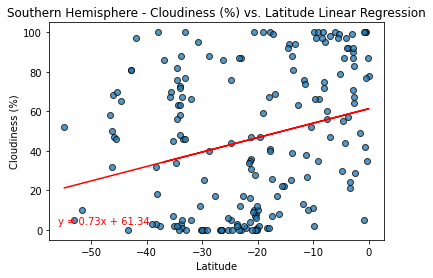

The r-value is: 0.27256949836496397


In [19]:
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values, marker = "o", edgecolor = "black", alpha = .75)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-56,3), fontsize=10, color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
plt.savefig("../Images/southern_cloudiness_linregress.png")
plt.show()

print(f"The r-value is: {rvalue}")

The linear regression plot above shows the relationship between latitude in the southern hemisphere and cloud coverage. Cloud coverage and latitude have a positive correlation in the southern hemisphere as well. The date points alone here also do not give a great indication of that. 

###  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

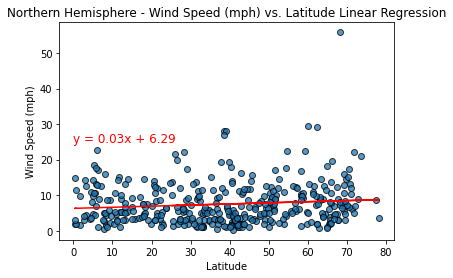

The r-value is: 0.10741718546576184


In [20]:
x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values, marker = "o", edgecolor = "black", alpha = .75)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0, 25), fontsize=12, color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
plt.savefig("../Images/northern_wind_linregress.png")
plt.show()

print(f"The r-value is: {rvalue}")

The linear regression plot above shows the relationship between latitude in the northern hemisphere and wind speed measured in MPH. Wind speed and latitude have a positive correlation in the northern hemisphere. Still, there is no great correlation between the two variables in this plot, as shown by the r-value being so close to 0. 

###  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

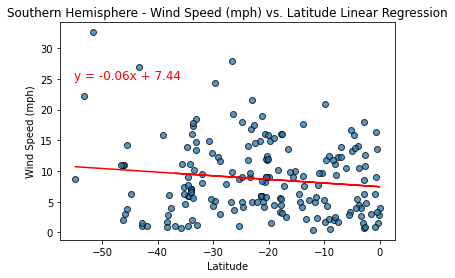

The r-value is: -0.1325331567392977


In [21]:
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values, marker = "o", edgecolor = "black", alpha = .75)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55, 25), fontsize=12, color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
plt.savefig("../Images/southern_wind_linregress.png")
plt.show()

print(f"The r-value is: {rvalue}")

The linear regression plot above shows the relationship between latitude in the southern hemisphere and wind speed measured in MPH. Wind speed and latitude have a negative correlation in the southern hemisphere, differing from the relationship between wind speed and latitude in the northern hemisphere. Similarly to the northern hemisphere, there is no great correlation between wind speed and latitude in the southern hemisphere, as shown by the r-value being so close to 0. 